#**Preparation of the environment**

## **Library installation**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import numpy as np
#Generate scan data
!pip install sweetviz
import sweetviz as sv

#from Save the dataframe and series in google DRIVE.
from google.colab import drive, files, auth
from google.auth import default
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **chart pie of target funcion**

In [ ]:
def chart_pie_target(target):
  # Data for the pie chart
  Mol_Subtype = list(target['Mol Subtype'])
  ER = list(target['ER'])
  PR = list(target['PR'])
  HER2 = list(target['HER2'])

  #obtain the unique classes and their frequencies
  class_mol, Mol_Subtype = np.unique(Mol_Subtype, return_counts=True)
  class_er, ER = np.unique(ER, return_counts=True)
  class_pr, PR = np.unique(PR, return_counts=True)
  clas_h2r, HER2 = np.unique(HER2, return_counts=True)

  class_multi = ["luminal_A","luminal_B","her2","triple_negative"]
  class_bi = ["negative","positive"]

  #create the figure and the subplots
  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

  # plot the data on each subplot
  axs[0, 0].pie(Mol_Subtype,labels=class_multi)
  axs[0, 0].set_title('Mol_Subtype')
  axs[0, 1].pie(ER,labels=class_bi)
  axs[0, 1].set_title('ER')
  axs[1, 0].pie(PR,labels=class_bi)
  axs[1, 0].set_title('PR')
  axs[1, 1].pie(HER2,labels=class_bi)
  axs[1, 1].set_title('HER2')

  #Create a figure with four subplots
  plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

  # Show the figure

  plt.show()

##**One vs Others funcion**

In [ ]:
def creating_binary_problems():
  problem = []
  chosen_problems = ["luminal_A","luminal_B","her2","triple_negative"]
  for i in range(len(chosen_problems)):
      df = df_base.drop(["Patient ID","ER","PR","HER2"], axis=1) #from the original dataframe, the indicated columns are eliminated, leaving the "molecular subtype" column as the target
      #Transforms other subtypes defined as class 1, where class 0 corresponds to the selected type.
      if chosen_problems[i] =="luminal_A":
        df.loc[df['Mol Subtype'] == 2, 'Mol Subtype'] = 1
        df.loc[df['Mol Subtype'] == 3, 'Mol Subtype'] = 1
        problem.append(list(df['Mol Subtype']))

      elif chosen_problems[i] =="luminal_B":
        df.loc[df['Mol Subtype'] == 0, 'Mol Subtype'] = 4
        df.loc[df['Mol Subtype'] == 1, 'Mol Subtype'] = 0
        df.loc[df['Mol Subtype'] == 2, 'Mol Subtype'] = 4
        df.loc[df['Mol Subtype'] == 3, 'Mol Subtype'] = 4
        df.loc[df['Mol Subtype'] == 4, 'Mol Subtype'] = 1
        problem.append(list(df['Mol Subtype']))
      elif chosen_problems[i] =="her2":
        df.loc[df['Mol Subtype'] == 0, 'Mol Subtype'] = 4
        df.loc[df['Mol Subtype'] == 1, 'Mol Subtype'] = 4
        df.loc[df['Mol Subtype'] == 2, 'Mol Subtype'] = 0
        df.loc[df['Mol Subtype'] == 3, 'Mol Subtype'] = 4
        df.loc[df['Mol Subtype'] == 4, 'Mol Subtype'] = 1
        problem.append(list(df['Mol Subtype']))
      else:
        df.loc[df['Mol Subtype'] == 0, 'Mol Subtype'] = 4
        df.loc[df['Mol Subtype'] == 1, 'Mol Subtype'] = 4
        df.loc[df['Mol Subtype'] == 2, 'Mol Subtype'] = 4
        df.loc[df['Mol Subtype'] == 3, 'Mol Subtype'] = 0
        df.loc[df['Mol Subtype'] == 4, 'Mol Subtype'] = 1
        problem.append(list(df['Mol Subtype']))
  #obtain the unique classes and their frequencies
  class_mol, luminal_A = np.unique(problem[0], return_counts=True)
  class_er, luminal_B = np.unique(problem[1], return_counts=True)
  class_pr, her2 = np.unique(problem[2], return_counts=True)
  clas_h2r, triple_negative = np.unique(problem[3], return_counts=True)

  class_A = ["luminal_A","others"]
  class_B = ["luminal_B","others"]
  class_H2 = ["her2","others"]
  class_TN = ["triple_negative", "others"]

  #create the figure and the subplots
  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

  # plot the data on each subplot
  axs[0, 0].pie(luminal_A,labels=class_A)
  axs[0, 0].set_title('luminal_A vs others')
  axs[0, 1].pie(luminal_B,labels=class_B)
  axs[0, 1].set_title('luminal_B vs others')
  axs[1, 0].pie(her2,labels=class_H2)
  axs[1, 0].set_title('her2 vs others')
  axs[1, 1].pie(triple_negative,labels=class_TN)
  axs[1, 1].set_title('triple_negative vs others')

  #Create a figure with four subplots
  plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

  # Show the figure

  plt.show()

#**Exploration the class**

This database was extracted from:
https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=70226903

The dataset is a single-institutional, retrospective collection of 922 biopsy-confirmed invasive breast cancer patients, over a decade, having the following data components.
For this code join both the image features with four targets (joining Imaging_Features.xlsx and Clinical_and_Other_Features.xlsx)


In [ ]:
df_base= pd.read_excel("/content/drive/MyDrive/Radiomics_Oversampling/Imaging_Features.xlsx") #the location of the file must be indicated
features = df_base.drop(["Patient ID",'Mol Subtype','ER','PR','HER2'], axis=1)
target = df_base[['Mol Subtype','ER','PR','HER2']]

In [ ]:
features.shape

(922, 529)

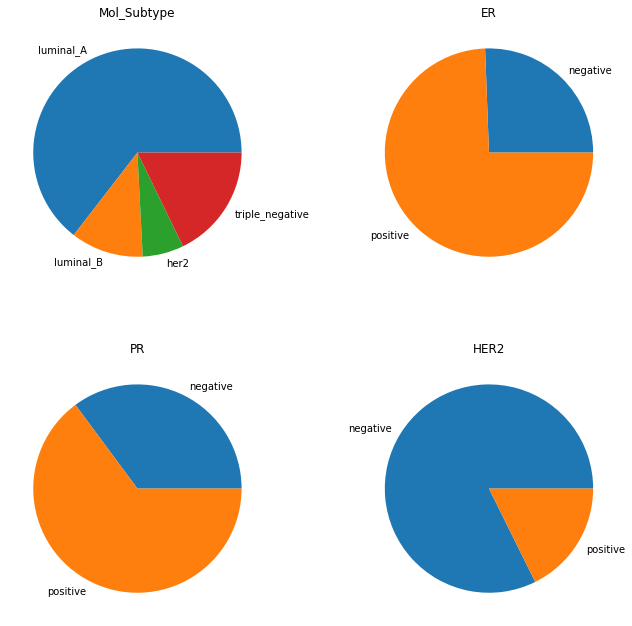

In [ ]:
chart_pie_target(target)

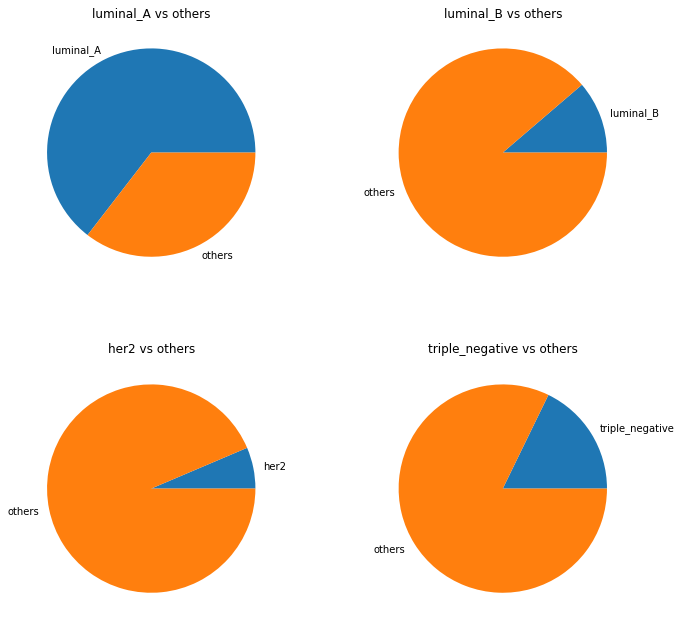

In [ ]:
creating_binary_problems()

In [194]:
df_= pd.read_excel("/content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Feature_radiomics_duke.xlsx")

In [196]:
df_['Feature Group'].unique()

array(['Breast and FGT Volume Features', 'Tumor Size and Morphology',
       'FGT Enhancement', 'Tumor Enhancement',
       'Combining Tumor and FGT Enhancement', 'FGT Enhancement Texture',
       'Tumor Enhancement Texture',
       'Tumor Enhancement Spatial Heterogeneity', nan,
       'FGT Enhancement Variation', 'Tumor Enhancement Variation'],
      dtype=object)

#**Data exploration by feature group**

###**1-Volumen de la mama y tejido fibroglandular.**

In [ ]:
#Filtro solo caracteristicas asociadas a volumen de la mama y tejido fibroglandular. Son solo 5 caracteristicas mas la etiqueta
Breast_and_FGT_Volume_Features = features[["BreastVol","tissueVol_T1","breastDensity_T1","tissueVol_PostCon","breastDensity_PostCon"]]

In [ ]:
my_report = sv.analyze(Breast_and_FGT_Volume_Features)
my_report.show_html("/content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Breast_and_FGT_Volume_Features.html")

                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Breast_and_FGT_Volume_Features.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


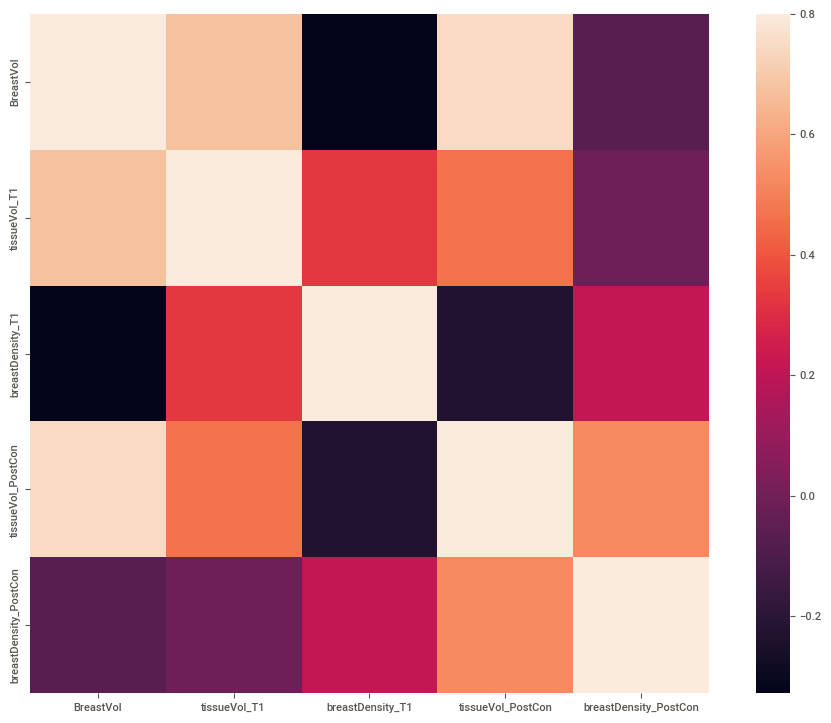

In [ ]:
matriz_Correlacion_Breast_and_FGT_Volume_Features= Breast_and_FGT_Volume_Features.corr()
#plot de correlation matrix 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matriz_Correlacion_Breast_and_FGT_Volume_Features, vmax=.8, square=True);

###**2- Tamaño y formologia del tumor.**

In [ ]:
#Filtro solo caracteristicas asociadas a tamaño y formologia del tumor. Son solo 10 caracteristicas mas la etiqueta
Tumor_Size_and_Morphology = features[["TumorMajorAxisLength_mm","Median_solidity_Tumor","Median_Elongation_Tumor","Median_Euler_No_Tumor", "BEVR_Tumor","BEDR1_Tumor","BEDR2_Tumor","MF_Tumor","ASD_Tumor","Volume_cu_mm_Tumor"]]

In [ ]:
my_report = sv.analyze(Tumor_Size_and_Morphology)
my_report.show_html("/content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Tumor_Size_and_Morphology.html")

                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Tumor_Size_and_Morphology.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


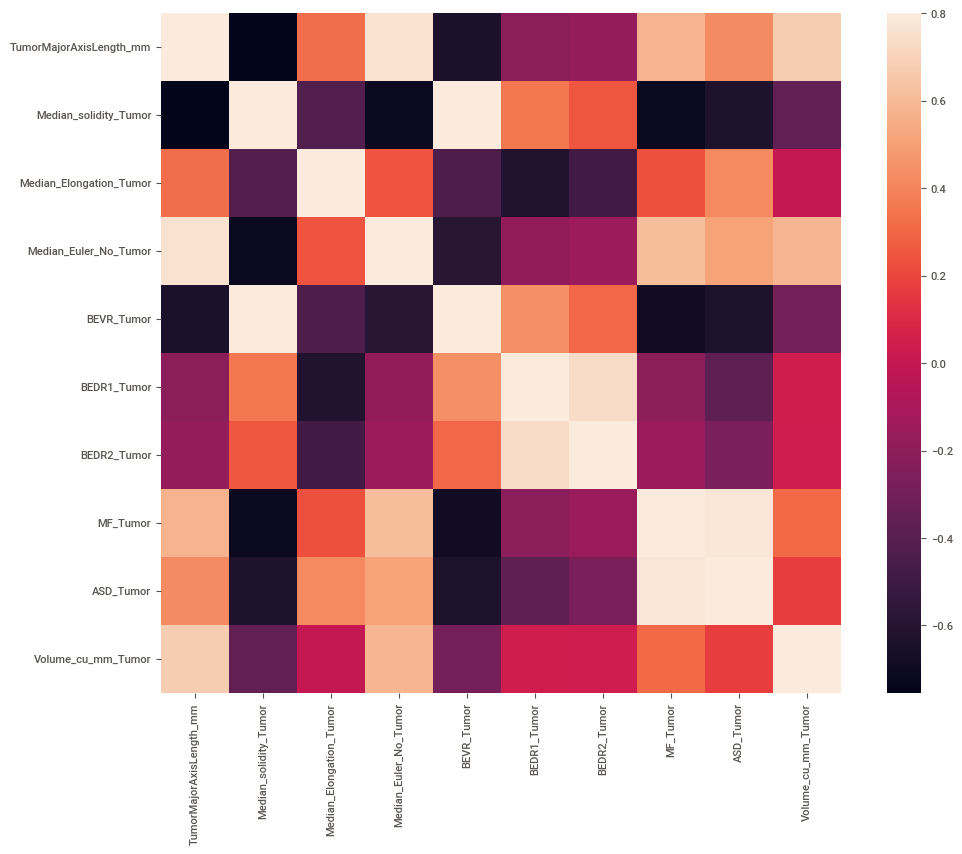

In [ ]:
matriz_Correlacion_Tumor_Size_and_Morphology = Tumor_Size_and_Morphology.corr()
#plot de correlation matrix 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matriz_Correlacion_Tumor_Size_and_Morphology, vmax=.8, square=True);

###**3-Realce del tejido fibroglandular.**

In [ ]:
#Filtro solo caracteristicas asociadas al relace del tejido fibroglandular. Son solo 82 caracteristicas mas la etiqueta
FGT_Enhancement = features[["Ratio_Tissue_vol_enhancing_more_than_0percent_from_T1_to_Breast_Vol", "Ratio_Tissue_vol_enhancing_more_than_10percent_from_T1_to_Breast_Vol", "Ratio_Tissue_vol_enhancing_more_than_20percent_from_T1_to_Breast_Vol", "Ratio_Tissue_vol_enhancing_more_than_30percent_from_T1_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_40percent_from_T1_to_Breast_Vol", "Ratio_Tissue_vol_enhancing_more_than_50percent_from_T1_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_60percent_from_T1_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_70percent_from_T1_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_80percent_from_T1_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_90percent_from_T1_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_100percent_from_T1_to_Breast_Vol", "Ratio_Tissue_vol_enhancing_more_than_0percent_from_T1_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_10percent_from_T1_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_20percent_from_T1_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_30percent_from_T1_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_40percent_from_T1_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_50percent_from_T1_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_60percent_from_T1_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_70percent_from_T1_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_80percent_from_T1_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_90percent_from_T1_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_100percent_from_T1_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_0percent_from_PostCon_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_10percent_from_PostCon_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_20percent_from_PostCon_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_30percent_from_PostCon_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_40percent_from_PostCon_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_50percent_from_PostCon_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_60percent_from_PostCon_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_70percent_from_PostCon_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_80percent_from_PostCon_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_90percent_from_PostCon_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_100percent_from_PostCon_to_Breast_Vol","Ratio_Tissue_vol_enhancing_more_than_0percent_from_PostCon_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_10percent_from_PostCon_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_20percent_from_PostCon_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_30percent_from_PostCon_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_40percent_from_PostCon_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_50percent_from_PostCon_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_60percent_from_PostCon_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_70percent_from_PostCon_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_80percent_from_PostCon_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_90percent_from_PostCon_to_Tissue_Vol","Ratio_Tissue_vol_enhancing_more_than_100percent_from_PostCon_to_Tissue_Vol","Grouping_based_mean_of_peak_enhancement_slope_3D_tissue_T1_Group_1","Grouping_based_mean_of_peak_enhancement_slope_3D_tissue_T1_Group_2","Grouping_based_mean_of_peak_enhancement_slope_3D_tissue_T1_Group_3","Grouping_based_mean_of_washin_slope_3D_tissue_T1_Group_1","Grouping_based_mean_of_washin_slope_3D_tissue_T1_Group_2","Grouping_based_mean_of_washin_slope_3D_tissue_T1_Group_3","Grouping_based_mean_of_washout_slope_3D_tissue_T1_Group_1","Grouping_based_mean_of_washout_slope_3D_tissue_T1_Group_2","Grouping_based_proportion_of_3D_tissue_T1_Group_1","Grouping_based_proportion_of_3D_tissue_T1_Group_2","Grouping_based_proportion_of_3D_tissue_T1_Group_3","Grouping_based_mean_of_peak_enhancement_slope_3D_tissue_PostCon_Group_1","Grouping_based_mean_of_peak_enhancement_slope_3D_tissue_PostCon_Group_2","Grouping_based_mean_of_peak_enhancement_slope_3D_tissue_PostCon_Group_3","Grouping_based_mean_of_washin_slope_3D_tissue_PostCon_Group_1","Grouping_based_mean_of_washin_slope_3D_tissue_PostCon_Group_2","Grouping_based_mean_of_washin_slope_3D_tissue_PostCon_Group_3","Grouping_based_mean_of_washout_slope_3D_tissue_PostCon_Group_1","Grouping_based_mean_of_washout_slope_3D_tissue_PostCon_Group_2","Grouping_based_proportion_of_3D_tissue_PostCon_Group_3","SER_Total_tissue_vol_cu_mm_T1","SER_Partial_tissue_vol_cu_mm_T1","SER_Washout_tissue_vol_cu_mm_T1","Peak_SER_tissue_T1","Peak_PE_tissue_T1","SER_map_mean_tissue_T1","PE_map_mean_tissue_T1","WashinRate_map_mean_tissue_T1","SER_Total_tissue_vol_cu_mm_PostCon","SER_Partial_tissue_vol_cu_mm_PostCon","SER_Washout_tissue_vol_cu_mm_PostCon","Peak_SER_tissue_PostCon","Peak_PE_tissue_PostCon","SER_map_mean_tissue_PostCon","PE_map_mean_tissue_PostCon","WashinRate_map_mean_tissue_PostCon"]]
FGT_Enhancement

,Ratio_Tissue_vol_enhancing_more_than_0percent_from_T1_to_Breast_Vol,Ratio_Tissue_vol_enhancing_more_than_10percent_from_T1_to_Breast_Vol,Ratio_Tissue_vol_enhancing_more_than_20percent_from_T1_to_Breast_Vol,Ratio_Tissue_vol_enhancing_more_than_30percent_from_T1_to_Breast_Vol,Ratio_Tissue_vol_enhancing_more_than_40percent_from_T1_to_Breast_Vol,Ratio_Tissue_vol_enhancing_more_than_50percent_from_T1_to_Breast_Vol,Ratio_Tissue_vol_enhancing_more_than_60percent_from_T1_to_Breast_Vol,Ratio_Tissue_vol_enhancing_more_than_70percent_from_T1_to_Breast_Vol,Ratio_Tissue_vol_enhancing_more_than_80percent_from_T1_to_Breast_Vol,Ratio_Tissue_vol_enhancing_more_than_90percent_from_T1_to_Breast_Vol,...,PE_map_mean_tissue_T1,WashinRate_map_mean_tissue_T1,SER_Total_tissue_vol_cu_mm_PostCon,SER_Partial_tissue_vol_cu_mm_PostCon,SER_Washout_tissue_vol_cu_mm_PostCon,Peak_SER_tissue_PostCon,Peak_PE_tissue_PostCon,SER_map_mean_tissue_PostCon,PE_map_mean_tissue_PostCon,WashinRate_map_mean_tissue_PostCon
0,0.301409,0.232611,0.169171,0.123707,0.090734,0.067133,0.051855,0.040500,0.031870,0.025681,...,20.579185,6.805473,65831.287898,217618.075224,120726.801382,9.101969,621.824223,0.648721,27.375609,14.517894
1,0.314380,0.223128,0.157294,0.117992,0.092819,0.075149,0.062317,0.052466,0.044711,0.038534,...,25.417921,41.356496,23514.014911,115275.839284,69978.415255,50.605450,2692.369411,0.460278,18.138343,47.297950
2,0.174178,0.155474,0.137184,0.120556,0.105873,0.093178,0.082458,0.073290,0.065482,0.058812,...,79.153904,58.278813,207983.329591,241746.869260,151380.064502,153.191685,19190.245246,0.801950,87.404234,114.171582
3,0.077347,0.068584,0.060282,0.053190,0.047154,0.042048,0.037713,0.033971,0.030703,0.027877,...,69.008246,20.498268,148961.873632,193869.086554,147558.415089,43.169195,4553.765862,0.729102,127.161675,33.499175
4,0.170825,0.146821,0.118192,0.091673,0.069639,0.052280,0.039344,0.029712,0.022327,0.016954,...,34.354035,28.314234,32839.965820,43669.433594,21242.675781,11.229319,417.114250,0.763233,46.232450,34.406635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.132853,0.102177,0.078233,0.061161,0.048731,0.039584,0.032898,0.027640,0.023490,0.020235,...,27.330436,21.376718,101496.141487,380193.130215,204195.136238,20.031984,2179.664575,0.675129,22.628485,30.665570
918,0.071294,0.053097,0.041086,0.033285,0.027656,0.023347,0.019926,0.017171,0.014935,0.013035,...,33.659272,18.666280,100926.796996,214751.305128,136473.366259,20.855110,2677.875079,0.576055,40.569481,19.556209
919,0.171173,0.148618,0.122249,0.097533,0.076312,0.059250,0.046660,0.036922,0.029403,0.023749,...,36.304018,18.186331,112503.003029,312306.751333,169466.694683,9.875049,547.728857,0.879557,40.332417,17.724748
920,0.200928,0.149027,0.103507,0.075408,0.058131,0.046704,0.038519,0.032318,0.027507,0.023678,...,32.316729,126.351055,70319.302741,104018.684207,60776.821655,37.512281,2166.024526,0.373794,24.690429,149.643082


In [ ]:
my_report = sv.analyze(FGT_Enhancement)
my_report.show_html("/content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/FGT_Enhancement.html")

                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/FGT_Enhancement.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


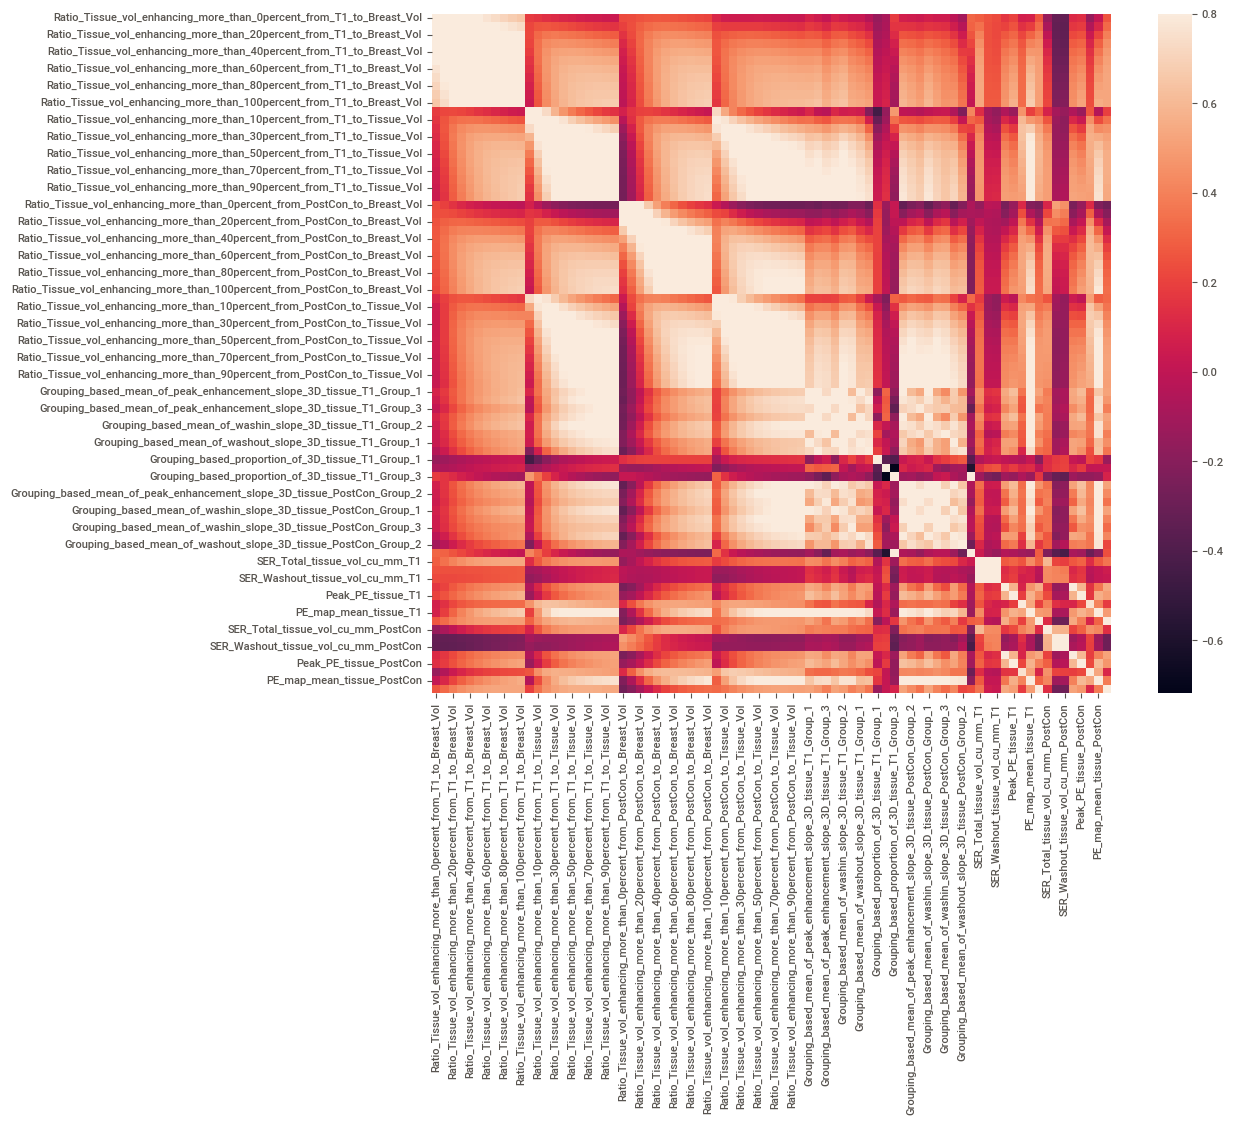

In [ ]:
matriz_Correlacion_FGT_Enhancement = FGT_Enhancement .corr()
#plot de correlation matrix 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matriz_Correlacion_FGT_Enhancement, vmax=.8, square=True);

###**4- Realce del tumor.**

In [ ]:
#Filtro solo caracteristicas asociadas al relace del tumor. Son solo 30 caracteristicas mas la etiqueta
Tumor_Enhancement = features[["Grouping_based_mean_of_peak_enhancement_slope_3D_tumor_Group_1","Grouping_based_mean_of_peak_enhancement_slope_3D_tumor_Group_2","Grouping_based_mean_of_peak_enhancement_slope_3D_tumor_Group_3","Grouping_based_mean_of_washin_slope_3D_tumor_Group_1","Grouping_based_mean_of_washin_slope_3D_tumor_Group_2","Grouping_based_mean_of_washin_slope_3D_tumor_Group_3","Grouping_based_mean_of_washout_slope_3D_tumor_Group_1","Grouping_based_mean_of_washout_slope_3D_tumor_Group_2","Grouping_based_proportion_of_tumor_voxels_3D_tumor_Group_1","Grouping_based_proportion_of_tumor_voxels_3D_tumor_Group_2","Grouping_based_proportion_of_tumor_voxels_3D_tumor_Group_3","Grouping_based_mean_of_peak_enhancement_slope_2D_tumorSlice_Group_1","Grouping_based_mean_of_peak_enhancement_slope_2D_tumorSlice_Group_2","Grouping_based_mean_of_peak_enhancement_slope_2D_tumorSlice_Group_3","Grouping_based_mean_of_washin_slope_2D_tumorSlice_Group_1","Grouping_based_mean_of_washin_slope_2D_tumorSlice_Group_2","Grouping_based_mean_of_washin_slope_2D_tumorSlice_Group_3","Grouping_based_mean_of_washout_slope_2D_tumorSlice_Group_1","Grouping_based_mean_of_washout_slope_2D_tumorSlice_Group_2","Grouping_based_proportion_of_tumor_voxels_2D_tumorSlice_Group_1","Grouping_based_proportion_of_tumor_voxels_2D_tumorSlice_Group_2","Grouping_based_proportion_of_tumor_voxels_2D_tumorSlice_Group_3","SER_Total_tumor_vol_cu_mm","SER_Partial_tumor_vol_cu_mm","SER_Washout_tumor_vol_cu_mm","Peak_SER_tumor","Peak_PE_tumor","SER_map_mean_tumor","PE_map_mean_tumor","WashinRate_map_mean_tumor"]]


In [ ]:
my_report = sv.analyze(Tumor_Enhancement)
my_report.show_html("/content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Tumor_Enhancement.html")

                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Tumor_Enhancement.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


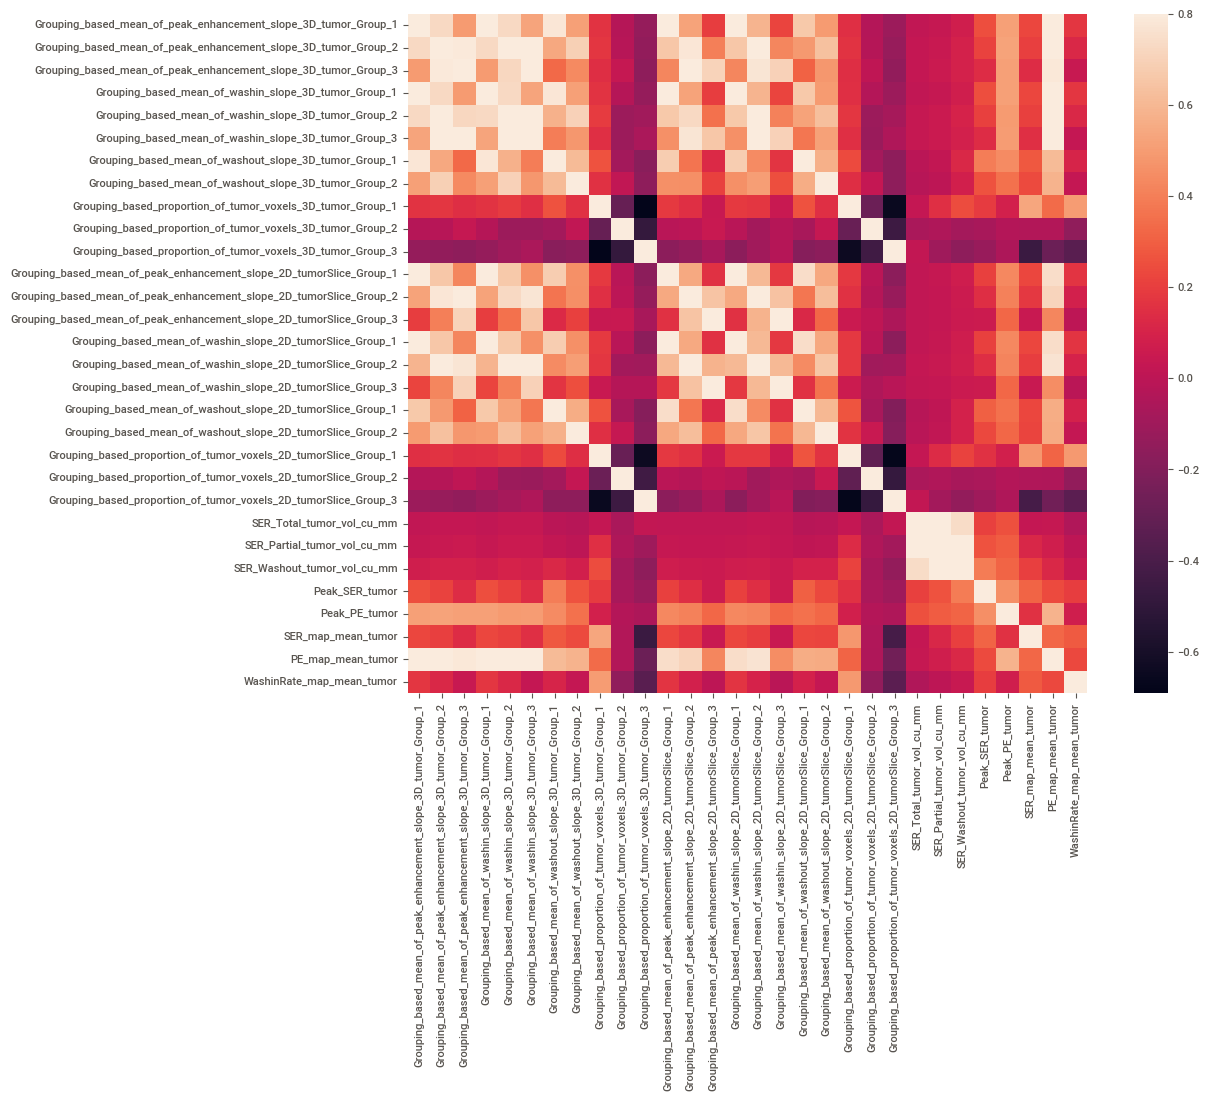

In [ ]:
matriz_Correlacion_Tumor_Enhancement = Tumor_Enhancement.corr()
#plot de correlation matrix 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matriz_Correlacion_Tumor_Enhancement, vmax=.8, square=True);

###**5-Combinacion realce del tumor y tejido fibroglandular .**

In [ ]:
#Filtro solo caracteristicas asociadas al relace del tumor y tejido fibroglandular. Son solo 18 caracteristicas mas la etiqueta
Combining_Tumor_and_FGT_Enhancement = features[['F1_DT_T1NFS (T11=0.05,T12=0.5)',"F1_DT_T1NFS(T11=0.05,T12=0.1)","F1_DT_T1NFS (T11=0.02,T12=0.5)","F1_DT_T1NFS (T11=0.02,T12=0.8)","F1_DT_T1NFS (T11=0.05,T12=0.8)","F1_DT_T1NFS (T11=0.1,T12=0.5)","F1_DT_T1NFS (T11=0.1,T12=0.8)","F1_DT_T1NFS (T11=0.2,T12=0.5)","F1_DT_T1NFS (T11=0.2,T12=0.8)","F1_DT_POSTCON (T11=0.05,T12=0.5)","F1_DT_POSTCON (T11=0.05,T12=0.1)","F1_DT_POSTCON (T11=0.02,T12=0.5)","F1_DT_POSTCON (T11=0.02,T12=0.8)","F1_DT_POSTCON (T11=0.05,T12=0.8)","F1_DT_POSTCON (T11=0.1,T12=0.5)","F1_DT_POSTCON (T11=0.1,T12=0.8)","F1_DT_POSTCON (T11=0.2,T12=0.5)","F1_DT_POSTCON (T11=0.2,T12=0.8)"]]

In [ ]:
my_report = sv.analyze(Combining_Tumor_and_FGT_Enhancement)
my_report.show_html("/content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Combining_Tumor_and_FGT_Enhancement.html")

                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Combining_Tumor_and_FGT_Enhancement.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


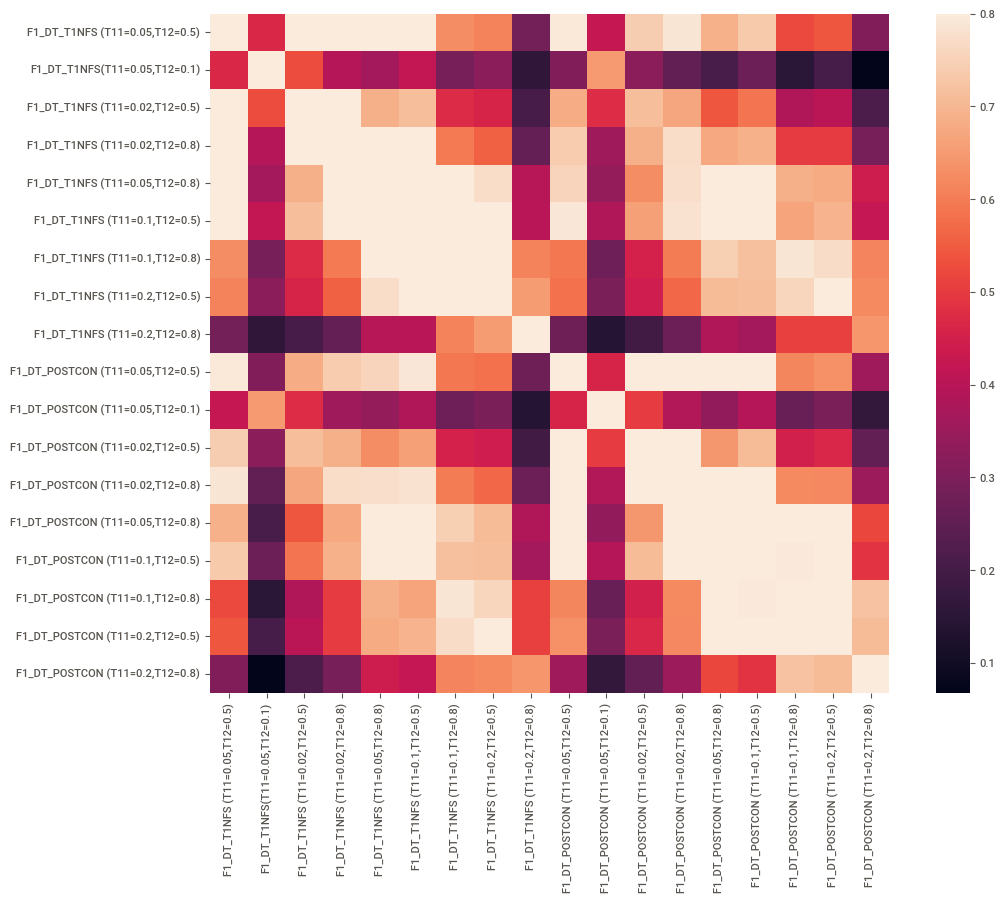

In [ ]:
matriz_Correlacion_Combining_Tumor_and_FGT_Enhancement = Combining_Tumor_and_FGT_Enhancement.corr()
#plot de correlation matrix 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matriz_Correlacion_Combining_Tumor_and_FGT_Enhancement, vmax=.8, square=True);

###**6-Textura del realce del tejido fibroglandular .**



In [ ]:
#Filtro solo caracteristicas asociadas a la textura del relace tejido fibroglandular. Son solo 176 caracteristicas mas la etiqueta
FGT_Enhancement_Texture = features[["Autocorrelation_tissue_T1","Contrast_tissue_T1","Correlation1_tissue_T1","Correlation2_tissue_T1","Cluster_Prominence_tissue_T1","Cluster_Shade_tissue_T1","Dissimilarity_tissue_T1","Energy_tissue_T1","Entropy_tissue_T1","Homogeneity1_tissue_T1","Homogeneity2_tissue_T1","Max_Probability_tissue_T1","Sum_of_Squares_variance_tissue_T1","sum_average_tissue_T1","sum_variance__tissue_T1","sum_entropy_tissue_T1","difference_entropy_tissue_T1","information_measure_correlation1_tissue_T1","information_measure_correlation2_tissue_T1","inverse_difference_is_homom_tissue_T1","inverse_difference_normalized_tissue_T1","inverse_difference_moment_normalized_tissue_T1","Autocorrelation_tissue_PostCon","Contrast_tissue_PostCon","Correlation1_tissue_PostCon","Correlation2_tissue_PostCon","Cluster_Prominence_tissue_PostCon","Cluster_Shade_tissue_PostCon","Dissimilarity_tissue_PostCon","Energy_tissue_PostCon","Entropy_tissue_PostCon","Homogeneity1_tissue_PostCon","Homogeneity2_tissue_PostCon","Max_Probability_tissue_PostCon","Sum_of_Squares_variance_tissue_PostCon","sum_average_tissue_PostCon","sum_variance__tissue_PostCon","sum_entropy_tissue_PostCon","difference_entropy_tissue_PostCon","information_measure_correlation1_tissue_PostCon","information_measure_correlation2_tissue_PostCon","inverse_difference_is_homom_tissue_PostCon","inverse_difference_normalized_tissue_PostCon","inverse_difference_moment_normalized_tissue_PostCon","SER_map_Autocorrelation_tissue_T1","SER_map_Contrast_tissue_T1","SER_map_Correlation1_tissue_T1","SER_map_Correlation2_tissue_T1","SER_map_Cluster_Prominence_tissue_T1","SER_map_Cluster_Shade_tissue_T1","SER_map_Dissimilarity_tissue_T1","SER_map_Energy_tissue_T1","SER_map_Entropy_tissue_T1","SER_map_Homogeneity1_tissue_T1","SER_map_Homogeneity2_tissue_T1","SER_map_Max_Probability_tissue_T1","SER_map_Sum_of_Squares_variance_tissue_T1","SER_map_sum_average_tissue_T1","SER_map_sum_variance__tissue_T1","SER_map_sum_entropy_tissue_T1","SER_map_difference_entropy_tissue_T1","SER_map_information_measure_correlation1_tissue_T1","SER_map_information_measure_correlation2_tissue_T1","SER_map_inverse_difference_is_homom_tissue_T1","SER_map_inverse_difference_normalized_tissue_T1","SER_map_inverse_difference_moment_normalized_tissue_T1","PE_map_Autocorrelation_tissue_T1","PE_map_Contrast_tissue_T1","PE_map_Correlation1_tissue_T1","PE_map_Correlation2_tissue_T1","PE_map_Cluster_Shade_tissue_T1","PE_map_Dissimilarity_tissue_T1","PE_map_Energy_tissue_T1","PE_map_Entropy_tissue_T1","PE_map_Homogeneity1_tissue_T1","PE_map_Homogeneity2_tissue_T1","PE_map_Max_Probability_tissue_T1","PE_map_Sum_of_Squares_variance_tissue_T1","PE_map_sum_average_tissue_T1","PE_map_sum_variance__tissue_T1","PE_map_sum_entropy_tissue_T1","PE_map_difference_entropy_tissue_T1","PE_map_information_measure_correlation1_tissue_T1","PE_map_information_measure_correlation2_tissue_T1","PE_map_inverse_difference_is_homom_tissue_T1","PE_map_inverse_difference_normalized_tissue_T1","PE_map_inverse_difference_moment_normalized_tissue_T1","WashinRate_map_Autocorrelation_tissue_T1","WashinRate_map_Contrast_tissue_T1","WashinRate_map_Correlation1_tissue_T1","WashinRate_map_Correlation2_tissue_T1","WashinRate_map_Cluster_Prominence_tissue_T1","WashinRate_map_Cluster_Shade_tissue_T1","WashinRate_map_Dissimilarity_tissue_T1","WashinRate_map_Energy_tissue_T1","WashinRate_map_Entropy_tissue_T1","WashinRate_map_Homogeneity1_tissue_T1","WashinRate_map_Homogeneity2_tissue_T1","WashinRate_map_Max_Probability_tissue_T1","WashinRate_map_Sum_of_Squares_variance_tissue_T1","WashinRate_map_sum_average_tissue_T1","WashinRate_map_sum_variance__tissue_T1","WashinRate_map_sum_entropy_tissue_T1","WashinRate_map_difference_entropy_tissue_T1","WashinRate_map_information_measure_correlation1_tissue_T1","WashinRate_map_information_measure_correlation2_tissue_T1","WashinRate_map_inverse_difference_is_homom_tissue_T1","WashinRate_map_inverse_difference_normalized_tissue_T1","WashinRate_map_inverse_difference_moment_normalized_tissue_T1","SER_map_Autocorrelation_tissue_PostCon","SER_map_Contrast_tissue_PostCon","SER_map_Correlation1_tissue_PostCon","SER_map_Correlation2_tissue_PostCon","SER_map_Cluster_Prominence_tissue_PostCon","SER_map_Cluster_Shade_tissue_PostCon","SER_map_Dissimilarity_tissue_PostCon","SER_map_Energy_tissue_PostCon","SER_map_Entropy_tissue_PostCon","SER_map_Homogeneity1_tissue_PostCon","SER_map_Homogeneity2_tissue_PostCon","SER_map_Max_Probability_tissue_PostCon","SER_map_Sum_of_Squares_variance_tissue_PostCon","SER_map_sum_average_tissue_PostCon","SER_map_sum_variance__tissue_PostCon","SER_map_sum_entropy_tissue_PostCon","SER_map_difference_entropy_tissue_PostCon","SER_map_information_measure_correlation1_tissue_PostCon","SER_map_information_measure_correlation2_tissue_PostCon","SER_map_inverse_difference_is_homom_tissue_PostCon","SER_map_inverse_difference_normalized_tissue_PostCon","SER_map_inverse_difference_moment_normalized_tissue_PostCon","PE_map_Autocorrelation_tissue_PostCon","PE_map_Contrast_tissue_PostCon","PE_map_Correlation1_tissue_PostCon","PE_map_Correlation2_tissue_PostCon","PE_map_Cluster_Prominence_tissue_PostCon","PE_map_Cluster_Shade_tissue_PostCon","PE_map_Dissimilarity_tissue_PostCon","PE_map_Energy_tissue_PostCon","PE_map_Entropy_tissue_PostCon","PE_map_Homogeneity1_tissue_PostCon","PE_map_Homogeneity2_tissue_PostCon","PE_map_Max_Probability_tissue_PostCon","PE_map_Sum_of_Squares_variance_tissue_PostCon","PE_map_sum_average_tissue_PostCon","PE_map_sum_variance__tissue_PostCon","PE_map_sum_entropy_tissue_PostCon","PE_map_difference_entropy_tissue_PostCon","PE_map_information_measure_correlation1_tissue_PostCon","PE_map_information_measure_correlation2_tissue_PostCon","PE_map_inverse_difference_is_homom_tissue_PostCon","PE_map_inverse_difference_normalized_tissue_PostCon","PE_map_inverse_difference_moment_normalized_tissue_PostCon","WashinRate_map_Autocorrelation_tissue_PostCon","WashinRate_map_Contrast_tissue_PostCon","WashinRate_map_Correlation1_tissue_PostCon","WashinRate_map_Correlation2_tissue_PostCon","WashinRate_map_Cluster_Prominence_tissue_PostCon","WashinRate_map_Cluster_Shade_tissue_PostCon","WashinRate_map_Dissimilarity_tissue_PostCon","WashinRate_map_Energy_tissue_PostCon","WashinRate_map_Entropy_tissue_PostCon","WashinRate_map_Homogeneity1_tissue_PostCon","WashinRate_map_Homogeneity2_tissue_PostCon","WashinRate_map_Max_Probability_tissue_PostCon","WashinRate_map_Sum_of_Squares_variance_tissue_PostCon","WashinRate_map_sum_average_tissue_PostCon","WashinRate_map_sum_variance__tissue_PostCon","WashinRate_map_difference_entropy_tissue_PostCon","WashinRate_map_information_measure_correlation1_tissue_PostCon","WashinRate_map_information_measure_correlation2_tissue_PostCon","WashinRate_map_inverse_difference_is_homom_tissue_PostCon","WashinRate_map_inverse_difference_normalized_tissue_PostCon","WashinRate_map_inverse_difference_moment_normalized_tissue_PostCon"]]

In [ ]:
my_report = sv.analyze(FGT_Enhancement_Texture)
my_report.show_html("/content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/FGT_Enhancement_Texture.html")

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.8/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)


Report /content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/FGT_Enhancement_Texture.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


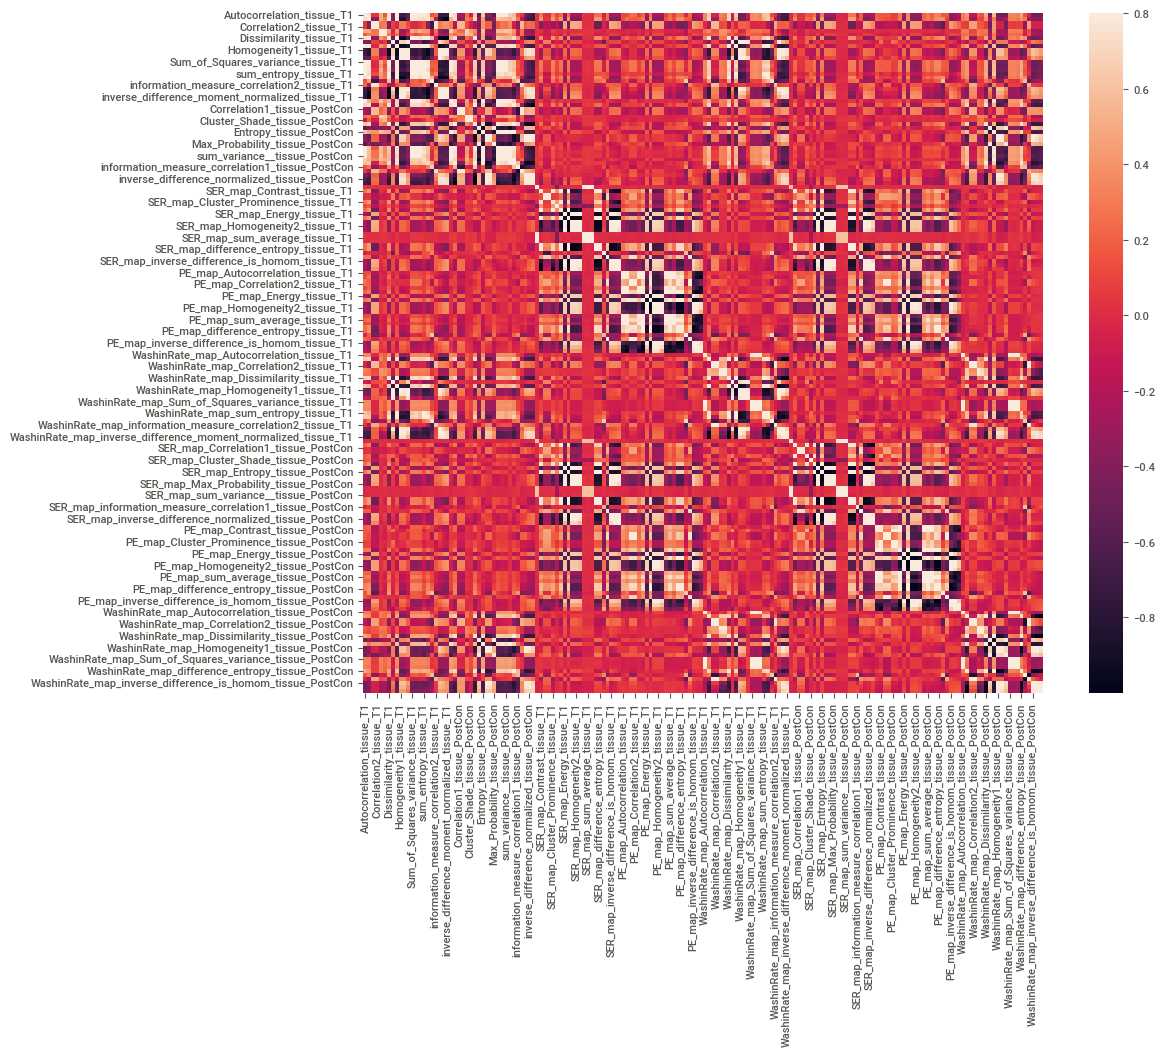

In [ ]:
matriz_Correlacion_FGT_Enhancement_Texture = FGT_Enhancement_Texture.corr()
#plot de correlation matrix 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matriz_Correlacion_FGT_Enhancement_Texture, vmax=.8, square=True);

###**7-Textura del realce del tumor .**

In [ ]:
#Filtro solo caracteristicas asociadas a la textura del relace tejido fibroglandular. Son solo 176 caracteristicas mas la etiqueta
Tumor_Enhancement_Texture = features[["1st_DFT_CoeffMap_Momment_Invariant_1_3D_tumor", "1st_DFT_CoeffMap_Momment_Invariant_2_3D_tumor","1st_DFT_CoeffMap_Momment_Invariant_3_3D_tumor", "1st_DFT_CoeffMap_Momment_Invariant_4_3D_tumor","1st_DFT_CoeffMap_Momment_Invariant_5_3D_tumor","1st_DFT_CoeffMap_Momment_Invariant_6_3D_tumor","1st_DFT_CoeffMap_Momment_Invariant_7_3D_tumor","2nd_DFT_CoeffMap_Momment_Invariant_1_3D_tumor","2nd_DFT_CoeffMap_Momment_Invariant_2_3D_tumor","2nd_DFT_CoeffMap_Momment_Invariant_3_3D_tumor","2nd_DFT_CoeffMap_Momment_Invariant_4_3D_tumor","1st_DFT_CoeffMap_Momment_Invariant_1_2D_tumorSlice","1st_DFT_CoeffMap_Momment_Invariant_2_2D_tumorSlice","1st_DFT_CoeffMap_Momment_Invariant_3_2D_tumorSlice","1st_DFT_CoeffMap_Momment_Invariant_4_2D_tumorSlice","1st_DFT_CoeffMap_Momment_Invariant_5_2D_tumorSlice","1st_DFT_CoeffMap_Momment_Invariant_6_2D_tumorSlice","1st_DFT_CoeffMap_Momment_Invariant_7_2D_tumorSlice","2nd_DFT_CoeffMap_Momment_Invariant_1_2D_tumorSlice","2nd_DFT_CoeffMap_Momment_Invariant_2_2D_tumorSlice","2nd_DFT_CoeffMap_Momment_Invariant_3_2D_tumorSlice","2nd_DFT_CoeffMap_Momment_Invariant_4_2D_tumorSlice","Mean_norm_DHOG_max_timepoint_binsize_2_without_filling_Tumor","Mean_norm_DHOG_max_timepoint_binsize_4_without_filling_Tumor","Mean_norm_DHOG_max_timepoint_binsize_6_without_filling_Tumor","Mean_norm_DHOG_max_timepoint_binsize_8_without_filling_Tumor","Mean_norm_DHOG_max_timepoint_binsize_10_without_filling_Tumor","Mean_norm_DLBP_max_timepoint_binsize_8_without_filling_Tumor","Mean_norm_DLBP_max_timepoint_binsize_16_without_filling_Tumor","Mean_norm_DLBP_max_timepoint_binsize_33_without_filling_Tumor","Mean_norm_DLBP_max_timepoint_binsize_64_without_filling_Tumor","Mean_norm_DLBP_max_timepoint_binsize_128_without_filling_Tumor","Mean_norm_DLBP_max_timepoint_binsize_256_without_filling_Tumor","Mean_norm_DHOG_max_timepoint_binsize_2_with_filling_Tumor","Mean_norm_DHOG_max_timepoint_binsize_4_with_filling_Tumor","Mean_norm_DHOG_max_timepoint_binsize_6_with_filling_Tumor","Mean_norm_DHOG_max_timepoint_binsize_8_with_filling_Tumor","Mean_norm_DHOG_max_timepoint_binsize_10_with_filling_Tumor","Mean_norm_DLBP_max_timepoint_binsize_8_with_filling_Tumor","Mean_norm_DLBP_max_timepoint_binsize_16_with_filling_Tumor","Mean_norm_DLBP_max_timepoint_binsize_33_with_filling_Tumor","Mean_norm_DLBP_max_timepoint_binsize_64_with_filling_Tumor","Mean_norm_DLBP_max_timepoint_binsize_128_with_filling_Tumor","Mean_norm_DLBP_max_timepoint_binsize_256_with_filling_Tumor","Margin_Gradient_Tumor","Variance_of_Margin_Gradient_Tumor","Variance_of_RGH_values_Tumor","SER_map_Autocorrelation_tumor","SER_map_Contrast_tumor","SER_map_Correlation1_tumor","SER_map_Correlation2_tumor","SER_map_Cluster_Prominence_tumor","SER_map_Cluster_Shade_tumor","SER_map_Dissimilarity_tumor","SER_map_Energy_tumor","SER_map_Entropy_tumor","SER_map_Homogeneity1_tumor","SER_map_Homogeneity2_tumor","SER_map_Max_Probability_tumor","SER_map_Sum_of_Squares_variance_tumor","SER_map_sum_average_tumor","SER_map_sum_variance__tumor","SER_map_sum_entropy_tumor","SER_map_difference_entropy_tumor","SER_map_information_measure_correlation1_tumor","SER_map_information_measure_correlation2_tumor","SER_map_inverse_difference_is_homom_tumor","SER_map_inverse_difference_normalized_tumor","SER_map_inverse_difference_moment_normalized_tumor","PE_map_Autocorrelation_tumor","PE_map_Contrast_tumor","PE_map_Correlation1_tumor","PE_map_Correlation2_tumor","PE_map_Cluster_Prominence_tumor","PE_map_Cluster_Shade_tumor","PE_map_Dissimilarity_tumor","PE_map_Energy_tumor","PE_map_Entropy_tumor","PE_map_Homogeneity1_tumor","PE_map_Homogeneity2_tumor","PE_map_Max_Probability_tumor","PE_map_Sum_of_Squares_variance_tumor","PE_map_sum_average_tumor","PE_map_sum_variance__tumor","PE_map_sum_entropy_tumor","PE_map_difference_entropy_tumor","PE_map_information_measure_correlation1_tumor","PE_map_information_measure_correlation2_tumor","PE_map_inverse_difference_is_homom_tumor","PE_map_inverse_difference_normalized_tumor","PE_map_inverse_difference_moment_normalized_tumor","WashinRate_map_Autocorrelation_tumor","WashinRate_map_Contrast_tumor","WashinRate_map_Correlation1_tumor","WashinRate_map_Correlation2_tumor","WashinRate_map_Cluster_Prominence_tumor","WashinRate_map_Dissimilarity_tumor","WashinRate_map_Energy_tumor","WashinRate_map_Entropy_tumor","WashinRate_map_Homogeneity1_tumor","WashinRate_map_Homogeneity2_tumor","WashinRate_map_Max_Probability_tumor","WashinRate_map_Sum_of_Squares_variance_tumor","WashinRate_map_sum_average_tumor","WashinRate_map_sum_variance__tumor","WashinRate_map_sum_entropy_tumor","WashinRate_map_difference_entropy_tumor","WashinRate_map_information_measure_correlation1_tumor","WashinRate_map_information_measure_correlation2_tumor","WashinRate_map_inverse_difference_is_homom_tumor","WashinRate_map_inverse_difference_normalized_tumor","WashinRate_map_inverse_difference_moment_normalized_tumor","Autocorrelation_Tumor","Contrast_Tumor","Correlation1_Tumor","Correlation2_Tumor","Cluster_Prominence_Tumor","Cluster_Shade_Tumor","Dissimilarity_Tumor","Energy_Tumor","Entropy_Tumor","Homogeneity1_Tumor","Homogeneity2_Tumor","Max_probability_Tumor","Sum_of_squares_variance_Tumor","Sum_avg_Tumor","Sum_variance_Tumor","Sum_entropy_Tumor","Diff_entropy_Tumor","Inf_mea_of_corr1_Tumor","Inf_mea_of_corr2_Tumor","Inv_Diff_homo_Tumor","Inv_Diff_normalized_Tumor","Inv_diff_moment_normalized_Tumor"]]

In [ ]:
my_report = sv.analyze(Tumor_Enhancement_Texture)
my_report.show_html("/content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Tumor_Enhancement_Texture.html")

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.8/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)


Report /content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Tumor_Enhancement_Texture.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


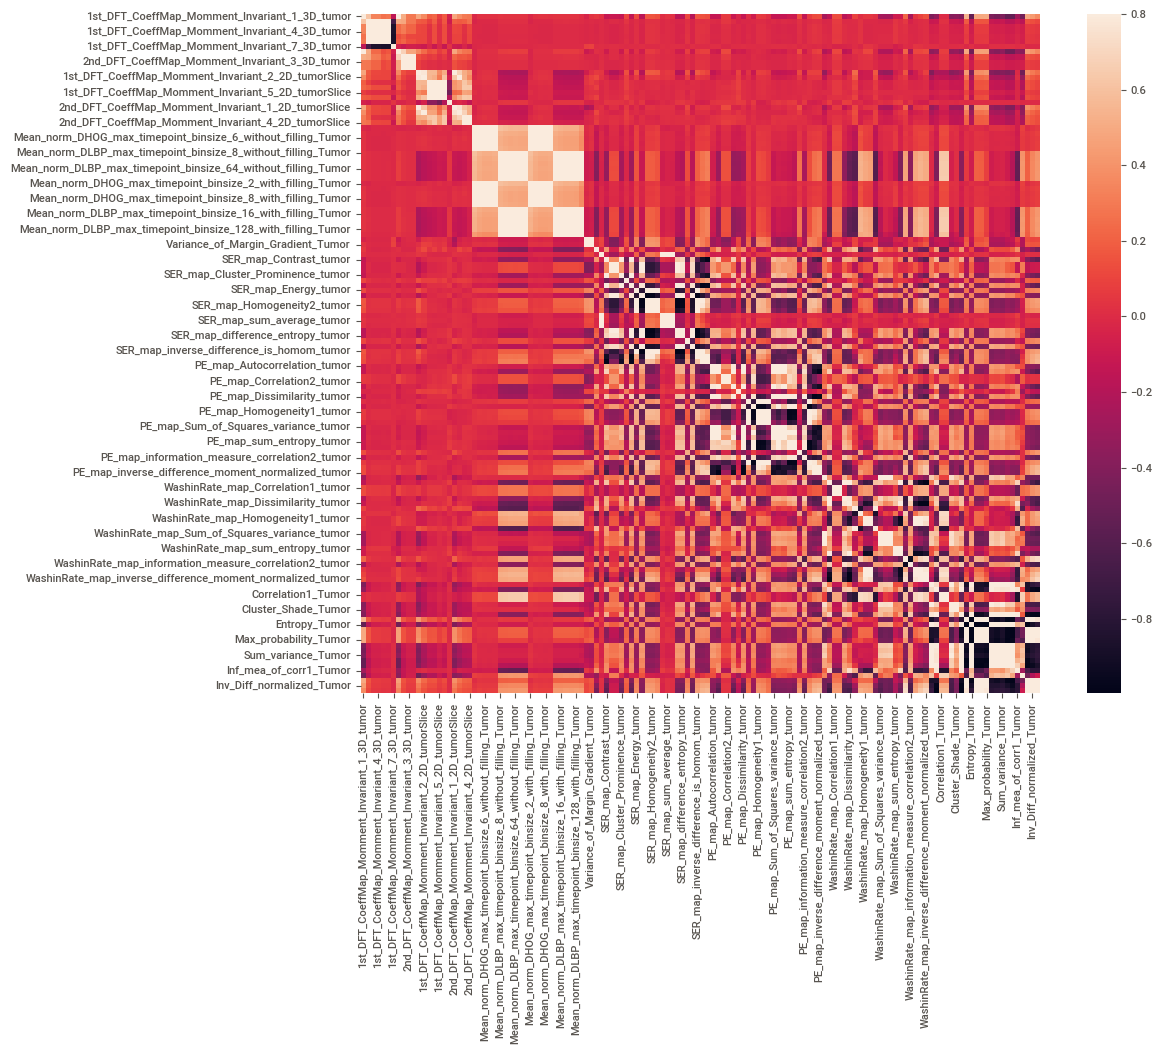

In [ ]:
matriz_Correlacion_Tumor_Enhancement_Texture = Tumor_Enhancement_Texture.corr()
#plot de correlation matrix 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matriz_Correlacion_Tumor_Enhancement_Texture, vmax=.8, square=True);

###**8-Heterogeneidad espacial del realce del tumor .**


In [ ]:
#Filtro solo caracteristicas asociadas a la textura del relace tejido fibroglandular. Son solo 4 caracteristicas mas la etiqueta
Tumor_Enhancement_Spatial_Heterogeneity = features[["globalMoransIEnhancementVarianceMap_Tumor","globalMoransISERMap_Tumor","EnhancementClusterNeighborhoodSimilarity_Tumor","EnhancementClusterDiscontinuity_Tumor"]]

In [ ]:
my_report = sv.analyze(Tumor_Enhancement_Spatial_Heterogeneity)
my_report.show_html("/content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Tumor_Enhancement_Spatial_Heterogeneity.html")

                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Tumor_Enhancement_Spatial_Heterogeneity.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


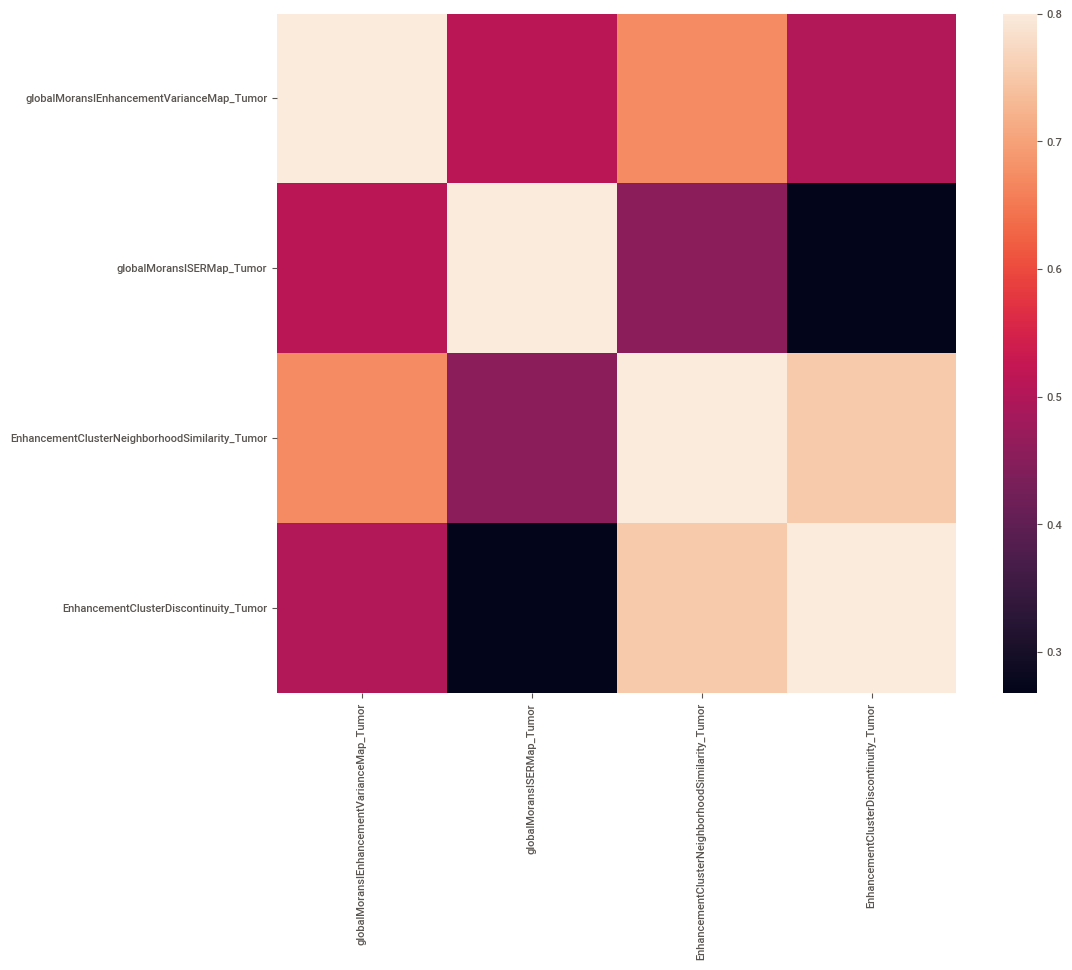

In [ ]:
matriz_Correlacion_Tumor_Enhancement_Spatial_Heterogeneity = Tumor_Enhancement_Spatial_Heterogeneity.corr()
#plot de correlation matrix 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matriz_Correlacion_Tumor_Enhancement_Spatial_Heterogeneity, vmax=.8, square=True);

###**9-Variacion del realce del tejido fibroglandular .**



In [ ]:
#Filtro solo caracteristicas asociadas a la textura del relace tejido fibroglandular. Son solo 34 caracteristicas mas la etiqueta
FGT_Enhancement_Variation = features[["Grouping_based_variance_of_peak_enhancement_slope_3D_tissue_T1_Group_1","Grouping_based_variance_of_peak_enhancement_slope_3D_tissue_T1_Group_2","Grouping_based_variance_of_peak_enhancement_slope_3D_tissue_T1_Group_3","Grouping_based_variance_of_washin_slope_3D_tissue_T1_Group_1","Grouping_based_variance_of_washin_slope_3D_tissue_T1_Group_2","Grouping_based_variance_of_washin_slope_3D_tissue_T1_Group_3","Grouping_based_variance_of_washout_slope_3D_tissue_T1_Group_1","Grouping_based_variance_of_washout_slope_3D_tissue_T1_Group_2","Grouping_based_variance_of_peak_enhancement_slope_3D_tissue_PostCon_Group_1","Grouping_based_variance_of_peak_enhancement_slope_3D_tissue_PostCon_Group_2","Grouping_based_variance_of_peak_enhancement_slope_3D_tissue_PostCon_Group_3","Grouping_based_variance_of_washin_slope_3D_tissue_PostCon_Group_1","Grouping_based_variance_of_washin_slope_3D_tissue_PostCon_Group_2","Grouping_based_variance_of_washin_slope_3D_tissue_PostCon_Group_3","Grouping_based_variance_of_washout_slope_3D_tissue_PostCon_Group_1","Grouping_based_variance_of_washout_slope_3D_tissue_PostCon_Group_2","SER_map_std_dev_tissue_T1","SER_map_skewness_tissue_T1","SER_map_kurtosis_tissue_T1","PE_map_std_dev_tissue_T1","PE_map_skewness_tissue_T1","PE_map_kurtosis_tissue_T1","WashinRate_map_std_dev_tissue_T1","WashinRate_map_skewness_tissue_T1","WashinRate_map_kurtosis_tissue_T1","SER_map_std_dev_tissue_PostCon","SER_map_skewness_tissue_PostCon","SER_map_kurtosis_tissue_PostCon","PE_map_std_dev_tissue_PostCon","PE_map_skewness_tissue_PostCon","PE_map_kurtosis_tissue_PostCon","WashinRate_map_std_dev_tissue_PostCon","WashinRate_map_skewness_tissue_PostCon","WashinRate_map_kurtosis_tissue_PostCon"]]

In [ ]:
my_report = sv.analyze(FGT_Enhancement_Variation)
my_report.show_html("/content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/FGT_Enhancement_Variation.html")

                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/FGT_Enhancement_Variation.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


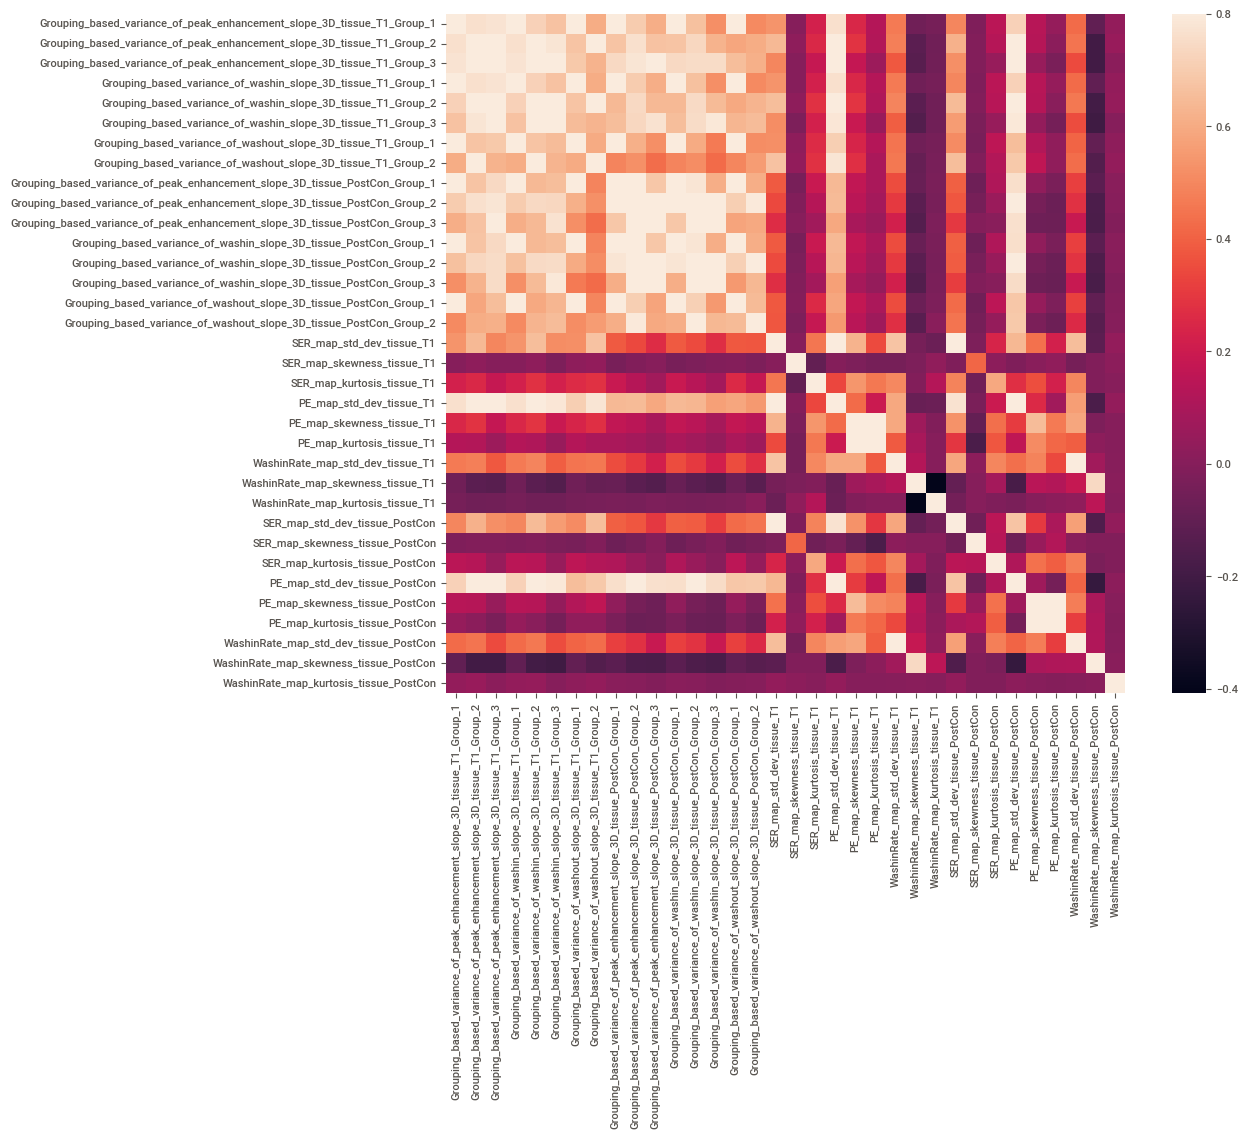

In [ ]:
matriz_Correlacion_FGT_Enhancement_Variation = FGT_Enhancement_Variation.corr()
#plot de correlation matrix 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matriz_Correlacion_FGT_Enhancement_Variation, vmax=.8, square=True);

###**10-Variacion del realce del tumor.**

In [ ]:
#Filtro solo caracteristicas asociadas a la variacion del relace del tumor. Son solo 35 caracteristicas mas la etiqueta
Tumor_Enhancement_Variation = features[["Maximum_variance_of_enhancement_Tumor","Peak_location_of_enhancement_variance_dynamics_Tumor","Enhancement_variance_increasing_rate_Tumor","Enhancement_variance_decreasing_rate_Tumor","Grouping_based_variance_of_peak_enhancement_slope_3D_tumor_Group_1","Grouping_based_variance_of_peak_enhancement_slope_3D_tumor_Group_2","Grouping_based_variance_of_peak_enhancement_slope_3D_tumor_Group_3","Grouping_based_variance_of_washin_slope_3D_tumor_Group_1","Grouping_based_variance_of_washin_slope_3D_tumor_Group_2","Grouping_based_variance_of_washin_slope_3D_tumor_Group_3","Grouping_based_variance_of_washout_slope_3D_tumor_Group_1","Grouping_based_variance_of_washout_slope_3D_tumor_Group_2","Grouping_based_variance_of_peak_enhancement_slope_2D_tumorSlice_Group_1","Grouping_based_variance_of_peak_enhancement_slope_2D_tumorSlice_Group_2","Grouping_based_variance_of_peak_enhancement_slope_2D_tumorSlice_Group_3","Grouping_based_variance_of_washin_slope_2D_tumorSlice_Group_1","Grouping_based_variance_of_washin_slope_2D_tumorSlice_Group_2","Grouping_based_variance_of_washin_slope_2D_tumorSlice_Group_3","Grouping_based_variance_of_washout_slope_2D_tumorSlice_Group_1","Grouping_based_variance_of_washout_slope_2D_tumorSlice_Group_2","Variance_of_Uptake_Tumor","Change_in_variance_of_Uptake_Tumor","SER_map_std_dev_tumor","SER_map_skewness_tumor","SER_map_kurtosis_tumor","PE_map_std_dev_tumor","PE_map_skewness_tumor","PE_map_kurtosis_tumor","WashinRate_map_std_dev_tumor","WashinRate_map_skewness_tumor","WashinRate_map_kurtosis_tumor","Max_Enhancement_from_char_curv","Time_to_Peak_from_char_curv","Uptake_rate_from_char_curv","Washout_rate_from_char_curv"]]
sweets = list(Tumor_Enhancement_Variation.columns)

In [ ]:
my_report = sv.analyze(Tumor_Enhancement_Variation)
my_report.show_html("/content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Tumor_Enhancement_Variation.html")

                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/Radiomics_Oversampling/Exploration_of_the_date/Tumor_Enhancement_Variation.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


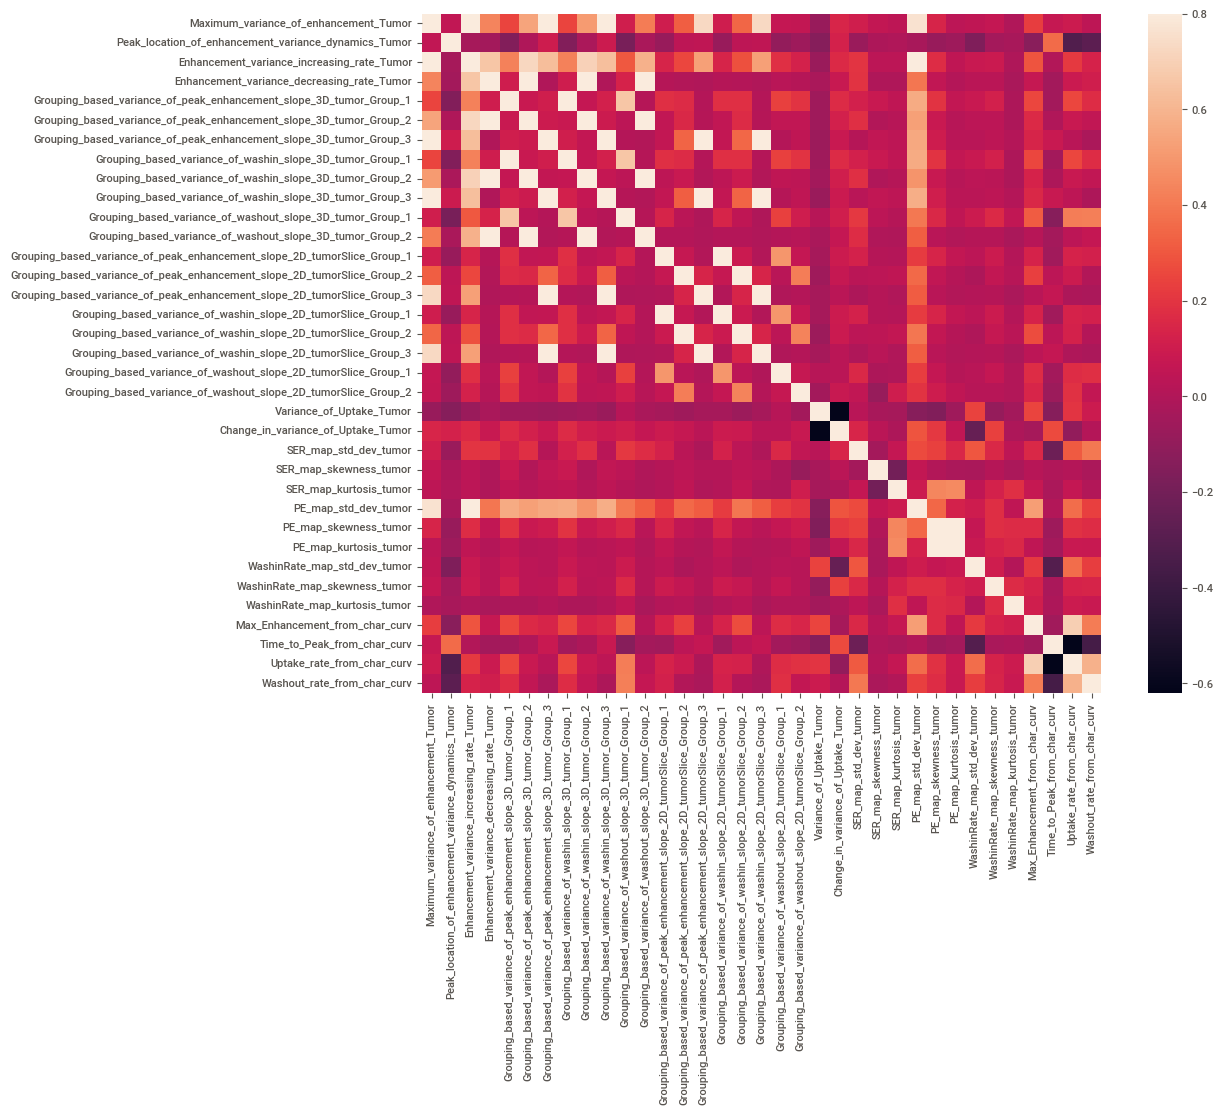

In [ ]:
matriz_Correlacion_Tumor_Enhancement_Variation = Tumor_Enhancement_Variation.corr()
#plot de correlation matrix 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matriz_Correlacion_Tumor_Enhancement_Variation, vmax=.8, square=True);